In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"] = (12, 6)
sns.set()

In [2]:
main_data = pd.read_csv("indian_food.csv")
main_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### Exploratory Data Analysis

#### Understand the data set

In [3]:
main_data.shape

(255, 9)

In [4]:
main_data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

#### undserstand the features of data set
- here i will go through each columns

In [5]:
main_data.name.nunique()

255

In [6]:
main_data.name = main_data.name.str.strip()
main_data.name = main_data.name.str.lower()

In [7]:
main_data.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [8]:
main_data.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [9]:
main_data.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [10]:
main_data.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [11]:
main_data.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

### Feature Engineering

In [12]:
# let's check the NaN value

main_data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [13]:
# here is NaN value in region columns

main_data[main_data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [14]:
main_data.loc[main_data.state == "Uttar Pradesh"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North


In [15]:
main_data.region.fillna("North", inplace = True)

#### Diet

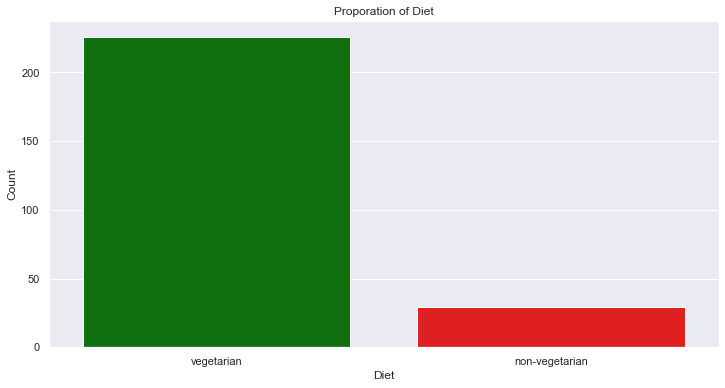

In [16]:
main_data.diet = main_data.diet.str.replace(" ", "-")

sns.countplot(data = main_data, x = "diet", palette = ["green", "red"])
plt.xlabel("Diet")
plt.ylabel("Count")
plt.title("Proporation of Diet")
plt.show()

#### observation: here vegetarian dishes are more than non - vegetarian

#### flavor_profile

In [17]:
main_data.flavor_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [18]:
main_data.flavor_profile = main_data.flavor_profile.replace("-1", "other")

In [19]:
main_data.flavor_profile.value_counts()

spicy     133
sweet      88
other      29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

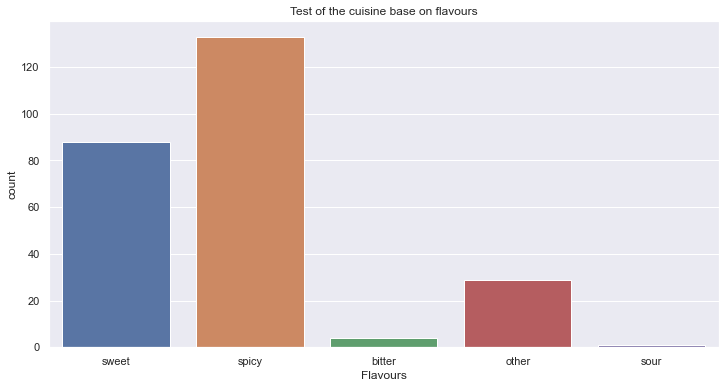

In [20]:
# let's plot flavor_profile

sns.countplot(data = main_data, x = "flavor_profile")
plt.xlabel("Flavours")
plt.title("Test of the cuisine base on flavours")
plt.show()

#### course

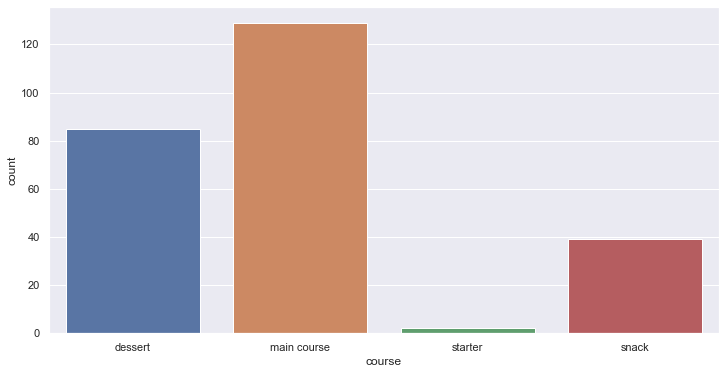

In [21]:
sns.countplot(data = main_data, x = "course")
plt.show()

#### state

In [22]:
main_data.state.value_counts().head()

Gujarat        35
Punjab         32
Maharashtra    30
West Bengal    24
-1             24
Name: state, dtype: int64

In [23]:
main_data.loc[main_data.state == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1


In [24]:
main_data.state = main_data.state.replace("-1", "All State")

In [25]:
main_data.state.nunique() - 1

24

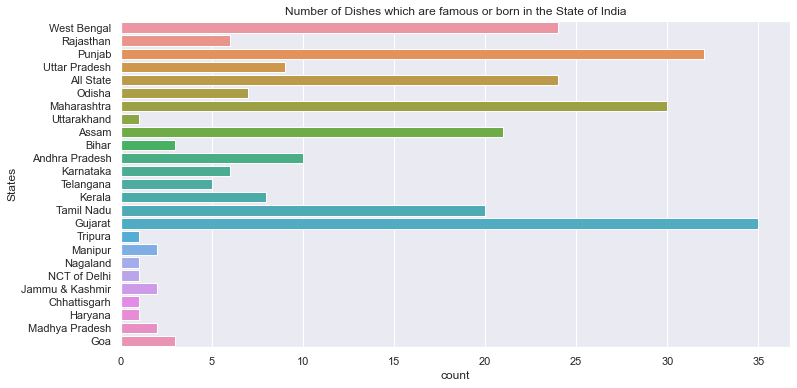

In [26]:
sns.countplot(data = main_data, y = "state")
plt.title("Number of Dishes which are famous or born in the State of India")
plt.ylabel("States")
plt.show()

In [27]:
main_data.region.value_counts()

West          74
South         59
North         50
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [28]:
main_data[main_data.region == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,All State,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,All State,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,All State,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,All State,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,All State,-1


In [29]:
main_data.region = main_data.region.replace("-1", "All Region")

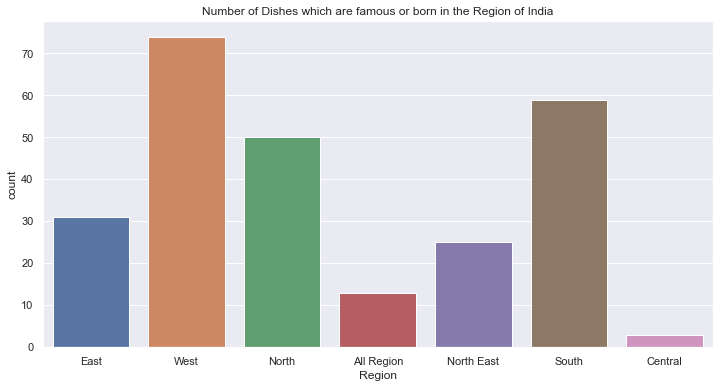

In [30]:
sns.countplot(data = main_data, x = "region")
plt.title("Number of Dishes which are famous or born in the Region of India")
plt.xlabel("Region")
plt.show()

In [31]:
main_data.prep_time.unique()

array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
       120,  60, 500, 150, 360, 495,  70,  35,  12], dtype=int64)

In [32]:
main_data.loc[main_data.prep_time == -1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


In [33]:

main_data.cook_time.unique()

array([ 25,  30,  60,  40,  50,  20,   5,  45, 120,  35,  90,  75,  15,
       720,  55,  -1,  10,   2,   6], dtype=int64)

In [34]:
main_data.loc[main_data.cook_time == -1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non-vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


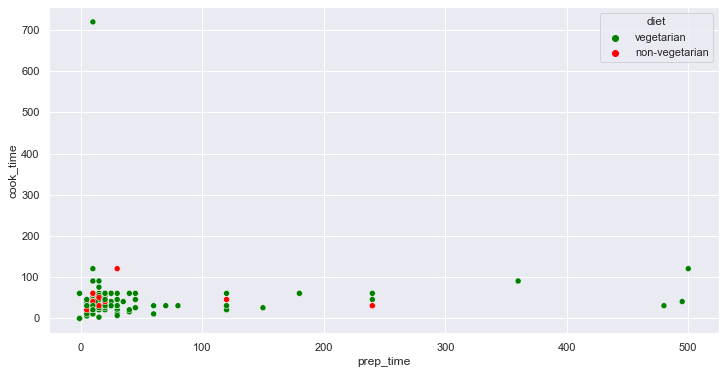

In [35]:
# let's plot prep time and cook time

sns.scatterplot(data = main_data, x = "prep_time", y = "cook_time",hue = "diet", palette=["green", "red"])
plt.show()

#### Ingredients

In [36]:
main_data.ingredients = main_data.ingredients.str.lower()
veg_ingredients = main_data.loc[main_data.diet == "vegetarian", "ingredients"]
non_veg_ingredients = main_data.loc[main_data.diet == "non-vegetarian", "ingredients"]
veg_ingredients.size + non_veg_ingredients.size

255

In [37]:
veg_ingredients.str.split(",")

0                   [maida flour,  yogurt,  oil,  sugar]
1                            [gram flour,  ghee,  sugar]
2      [carrots,  milk,  sugar,  ghee,  cashews,  rai...
3      [flour,  ghee,  kewra,  milk,  clarified butte...
4      [milk powder,  plain flour,  baking powder,  g...
                             ...                        
250          [glutinous rice,  black sesame seeds,  gur]
251    [coconut milk,  egg yolks,  clarified butter, ...
252    [cottage cheese,  dry dates,  dried rose petal...
253    [milk powder,  dry fruits,  arrowroot powder, ...
254    [brown rice,  fennel seeds,  grated coconut,  ...
Name: ingredients, Length: 226, dtype: object

In [38]:
veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","):
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):
    non_veg_cleaned_ingredients += i

In [39]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many tim ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

In [40]:
final_veg_ingredients

,ingredients,count
0,sugar,47
1,urad dal,25
2,ghee,25
3,curry leaves,24
4,garam masala,23
...,...,...
316,red food coloring,1
317,bay leaf,1
318,boondi,1
319,apricots,1


In [41]:
final_non_veg_ingredients

,ingredients,count
0,mustard oil,7
1,ginger,6
2,chicken,6
3,garam masala powder,4
4,garam masala,4
...,...,...
91,basmati rice,1
92,wine vinegar,1
93,lamb,1
94,bombay rava,1


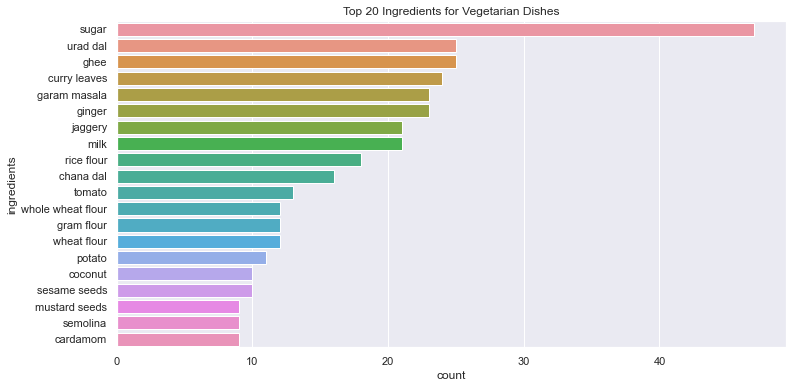

In [42]:
sns.barplot(data = final_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Vegetarian Dishes")
plt.show()

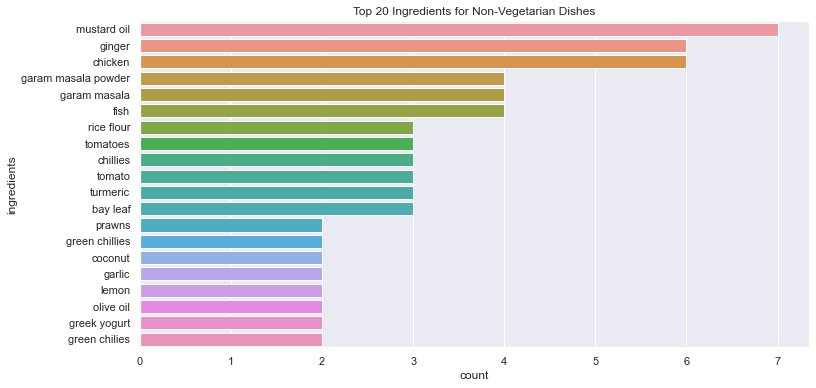

In [43]:
sns.barplot(data = final_non_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Non-Vegetarian Dishes")
plt.show()

In [44]:
data = main_data.copy()
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [45]:

top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,urad dal,25
2,ghee,25
3,curry leaves,24
4,garam masala,23


In [46]:
final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

,ingredients,count
4,garam masala,23
5,ginger,23
8,rice flour,18
10,tomato,13
15,coconut,10
21,ginger,6
24,garam masala,4
26,rice flour,3
29,tomato,3
34,coconut,2


In [47]:

final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ginger,29
2,garam masala,27
3,urad dal,25
4,ghee,25


In [48]:
# let's find out the total ingredients

final_ingredients.ingredients.nunique()
# so we have total 35 ingredients

35

In [49]:
for i in final_ingredients.ingredients:
    data[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    data.loc[data.ingredients.str.contains(i), [i]] = 1

In [50]:
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,chillies,turmeric,tomatoes,greek yogurt,green chilies,olive oil,garlic,lemon,green chillies,prawns
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0


#### feature selection of diet

In [51]:
diet_encoding = pd.get_dummies(main_data.diet, drop_first=True)
diet_encoding.head()

,vegetarian
0,1
1,1
2,1
3,1
4,1


In [52]:
data = pd.concat([data, diet_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,turmeric,tomatoes,greek yogurt,green chilies,olive oil,garlic,lemon,green chillies,prawns,vegetarian
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
flavor_profile_encoding = pd.get_dummies(main_data.flavor_profile, drop_first=True)
flavor_profile_encoding.head(2)

,other,sour,spicy,sweet
0,0,0,0,1
1,0,0,0,1


In [54]:
data = pd.concat([data, flavor_profile_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,olive oil,garlic,lemon,green chillies,prawns,vegetarian,other,sour,spicy,sweet
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,1,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,1,0,0,0,1


#### feature selection of course

In [55]:
# let's encode course using one hot encoding

# here i drop first column which is dessert for preventing dummy variable trap
course_encoding = pd.get_dummies(main_data.course, drop_first = True)
course_encoding.head(2)

,main course,snack,starter
0,0,0,0
1,0,0,0


In [56]:
# let's concat it with our main "data" data frame

data = pd.concat([data, course_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,green chillies,prawns,vegetarian,other,sour,spicy,sweet,main course,snack,starter
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,1,0,0,0,1,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,1,0,0,0,1,0,0,0


#### feature selection of state

In [57]:
state_encoding = pd.get_dummies(main_data.state, drop_first = True)
state_encoding.head(2)

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# let's concat it with our main "data" data frame

data = pd.concat([data, state_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,1,0,0,0,0,0,0


#### feature selection region

In [59]:
region_encoding = pd.get_dummies(main_data.region, drop_first = True)
region_encoding.head(2)

,Central,East,North,North East,South,West
0,0,1,0,0,0,0
1,0,0,0,0,0,1


In [60]:
data = pd.concat([data, region_encoding], axis = 1)
data.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


#### creating final data frame

In [61]:
# let's create a final data frame
# let's remove unnecessary columns which are not required not and store it as final_data

final_data = data.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

,name,sugar,ginger,garam masala,urad dal,ghee,curry leaves,jaggery,rice flour,milk,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,boondi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,ghevar,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [62]:
# here i'm going to use Nearest Neighbors using cosine similarity so for model purpose let's take name column
# as a index

final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,urad dal,ghee,curry leaves,jaggery,rice flour,milk,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
boondi,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gajar ka halwa,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
ghevar,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
gulab jamun,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### Model Builiding

In [63]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "brute")
model.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [72]:
# now our model is ready so let's test it

picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'sattu ki roti'

In [73]:
distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [74]:
distance

array([[0.        , 0.26970326, 0.27831216, 0.31958618, 0.33333333,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.3827866 ,
        0.3827866 ]])

In [75]:
cuisine_index

array([[118,  73,  99, 115, 107, 108,  91, 114, 106, 112,  72]],
      dtype=int64)

In [76]:
distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

# probably first one is always our picked cuisine

print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for  sattu ki roti  are following
1 .  bhatura  with distance  0.26970325665977846
2 .  litti chokha  with distance  0.2783121635129677
3 .  rajma chaval  with distance  0.3195861825602283
4 .  paneer butter masala  with distance  0.33333333333333315
5 .  paneer tikka masala  with distance  0.33333333333333315
6 .  kadai paneer  with distance  0.33333333333333315
7 .  pindi chana  with distance  0.33333333333333315
8 .  palak paneer  with distance  0.33333333333333315
9 .  paratha  with distance  0.38278660015163235
10 .  aloo shimla mirch  with distance  0.38278660015163235


In [69]:
# let's export our main data for showing data on web app
main_data.to_csv("cleaned_data.csv", index = False)

# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

In [70]:
# let's export model using pickle file

import pickle

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)